# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [94]:
# Import libraries necessary for this project
%reset 
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [95]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


 **<span style="color:blue"> Add one more visualization here to get more intuitive understanding <span>**

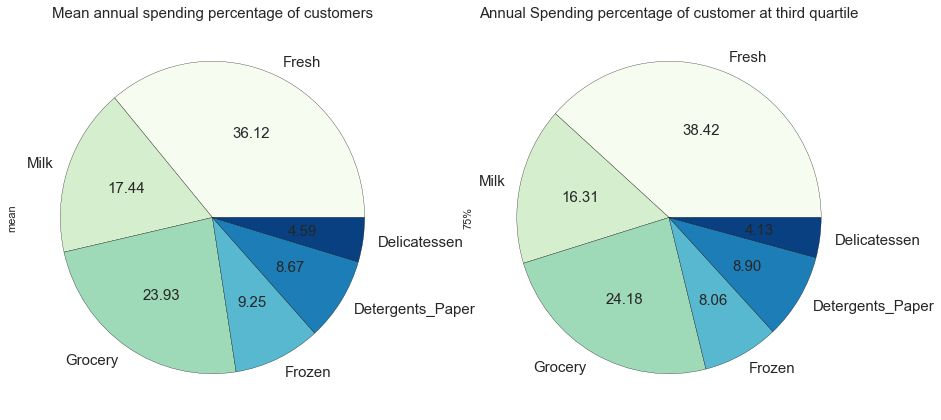

In [60]:
axes = data.describe().loc[['mean','75%']].T.plot.pie(subplots=True, legend=False,
                                               figsize=(15,7), colormap='GnBu',
                                              autopct='%.2f',fontsize=15)

axes[0].set_title('Mean annual spending percentage of customers')
axes[0].title.set_size(15)
axes[1].set_title('Annual Spending percentage of customer at third quartile')
axes[1].title.set_size(15)

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [96]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [12, 200, 430]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,3067,13240,23127,3941,9959,731
2,3097,4230,16483,575,241,2080


([<matplotlib.axis.XTick at 0x1162b0190>,
 <a list of 4 Text xticklabel objects>)

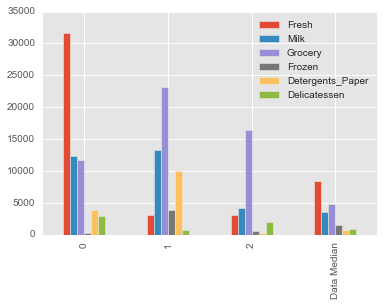

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))

samples_cpy = samples.copy()
samples_cpy.loc[samples.shape[0]] = data.median()

plt.style.use('ggplot')
samples_cpy.plot(kind='bar')
labels = samples.index.values.tolist()
labels.append("Data Median")
plt.xticks(range(samples.shape[0]+1),labels)

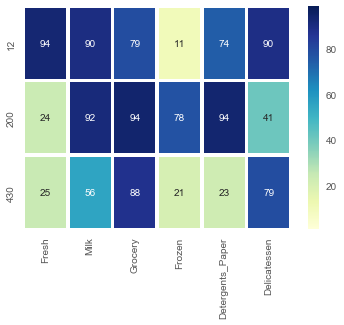

In [107]:
# Unlink the comparision above, the code in this block compare the data in a meaningful way. Because each
# feature's value is determined by the relative ranking of its own. Therefore, the dark degree of each entry
# indeed answer this question: Is this sample spending a lot on this type of food compared with all the 
# other customers?

percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True,linewidths=2.5, cmap="YlGnBu")

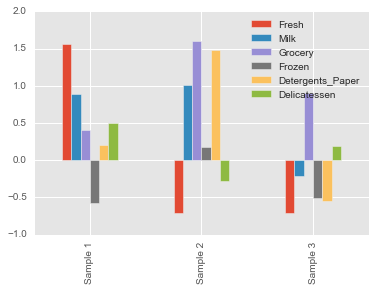

In [109]:
# This sample also delivers a meaningful comparison between different type of spending. 
# Unlike the former one, which compared based on the relative ranking. This block compares
# between samples after standardization and normalization. Therefore, each value represents
# the number of standard deviations from the mean value. 

samples_for_plot = samples.copy()
samples_for_plot = (samples_for_plot - data.mean())/data.std()

labels = ['Sample 1','Sample 2','Sample 3']
samples_for_plot.plot(kind='bar')
_ = plt.xticks(range(3),labels)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

- From the Heatmap above, we can see that the first customer has higher comsumption on Fresh, Milk and Delicatessen than approximately 90% of all customer. And at the same time, he comsume a relatively high amount of Grocery and Detergents_Paper, but alost lowest amount of Frozen. I think based on the analysis from above, customer 12 is likely to be a market, probably an outdoor market. And the market is best known for the freshness of their food, although the sellers also have some grocery for their customers. That explains why they almost have no Frozen on sell.


- The second customer, on the contrary, have spend relatively fewer on Fresh and Delicatessen, especially on Fresh, where they are below the lower 25%. Instead, they spent tremendous amount of the budget on Grocery, Detergents_Paper and Milk. And they also have above the average Frozen. So it seems reasonable to infer that the second customer is a large local Grecery Store with cafe inside. They probably located near the living area, where their customers can buy stuff within walking distance. Sometimes people can also have breakfast in that store, that explains why this customer also have high comsumption on Detergents_Paper. 


- For the third customer, they have below 25% of Fresh, Frozen, Detergents_Paper and above 75% Grocery and Delicateseen. This looks like a mid-size Grocery Store, with a small cafe inside. People are most likely to drive through the store to grab food, but the store inside don't have lots of seats. So it's possible it's located in downtown NewYork, where the rent is extremely high. 


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

 **<span style="color:blue"> As suggested, I average the prediction score over many random_state values to mitigate the impact of it. <span>**

In [110]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
name = 'Delicatessen'
score = 0

new_data = data.drop([name], axis=1, inplace=False)
new_target = data[name]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, new_target, test_size=0.25, random_state=2)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

for s in xrange(0, 100):
    regressor = DecisionTreeRegressor(random_state=s)
    regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
    score += regressor.score(X_test, y_test)
    
score /= 100
print "The average score {0} we got by removing feature {1}".format(score, name)

The average score -2.08477299898 we got by removing feature Delicatessen


In [111]:
# The training and testing split of above code block in not entirely random. The section below fixed this problem. 

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, X_test,  y_train, y_test = train_test_split(new_data,data[feature],test_size=0.25)
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature) for _ in range(200) ]).mean().round(4)

print "{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))
print "{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk'))
print "{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery'))
print "{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen'))
print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
print "{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen'))

Fresh:            -0.7354
Milk:             0.1359
Grocery:          0.6814
Frozen:           -1.0374
Detergents_Paper:  0.6901
Delicatessen:     -2.7538


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

1. I attempted to predict all of them, and the result is listed below (Updated Values):

    - Milk: -0.17
    - Fresh: -0.59
    - Grocery: 0.55
    - Frozen: -5.25
    - Detergents_Paper: 0.50
    - Delicatessen: -2.08
   
2. The reported prediction score for my chosen one, Grocery, is 0.55. And to be honest, this score is not high enough to justify its removal. 

3. I would say that all of the features are necessary for identifying customers, if we have to find the least necessary one, I would pick between Detergents_Paper and Grocery. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

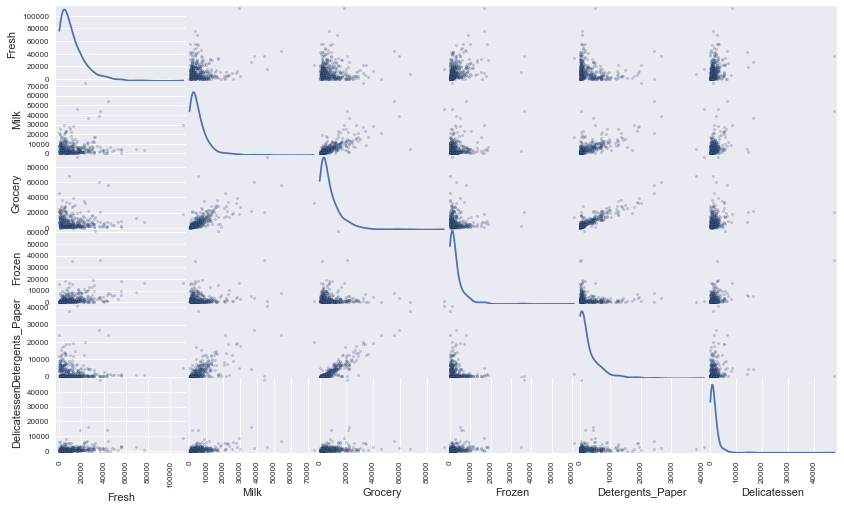

In [72]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

1. The data is definitely not normally distributed, and all the features leans toward zero (positive skewed). To be specific, the majority of the feature values are smaller than \$10,000. And there exists some outlier for almost every feature as well. For example, there exists two customers who spent about \$40,000 on Frozen, while the others are way too much less than this amount. 

2. Grocery, Detergent, Milk show some degree of correlation. I plot them individually below. And Compared with Milk's correlationship with the other two, grocery and detergent's correlationship is the strongest. 

3. I think this confirm my suspicions that Detergents_Paper might not be that necessary compared with the others. And based on the heatmap, it seems that Detergents_Paper and Grocery are highly correlated.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a03450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124785dd0>]], dtype=object)

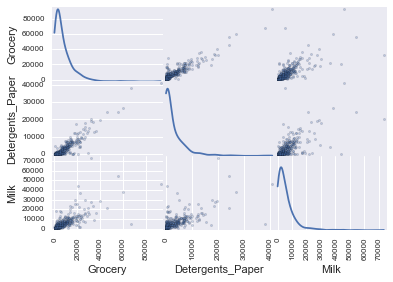

In [78]:
gro_det = data.loc[:, ['Grocery', 'Detergents_Paper', 'Milk']]
pd.scatter_matrix(gro_det, alpha=0.3, diagonal = 'kde')

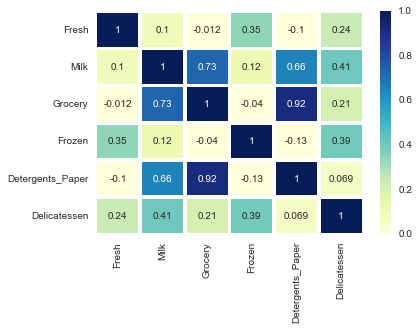

In [79]:
sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True,linewidths=2.5, cmap="YlGnBu")

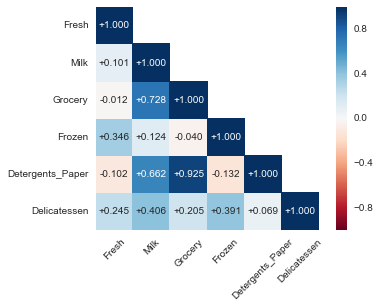

In [127]:
# Generate a heat map of feature's correlation in a nicer way. 

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

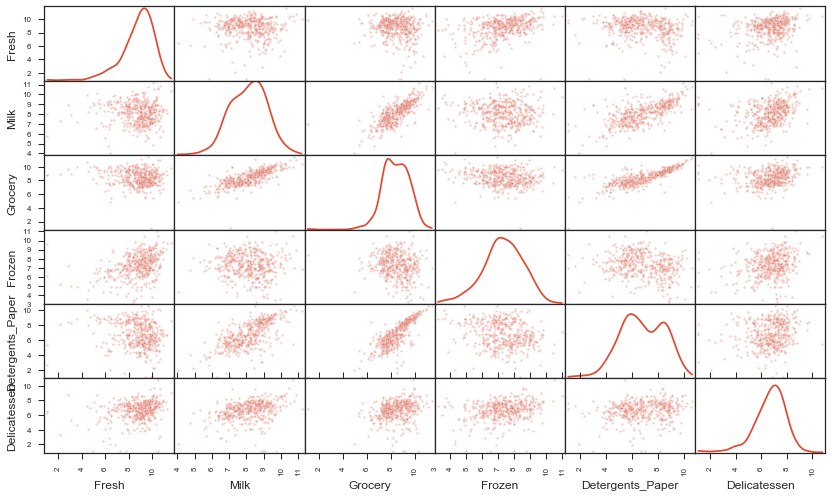

In [140]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

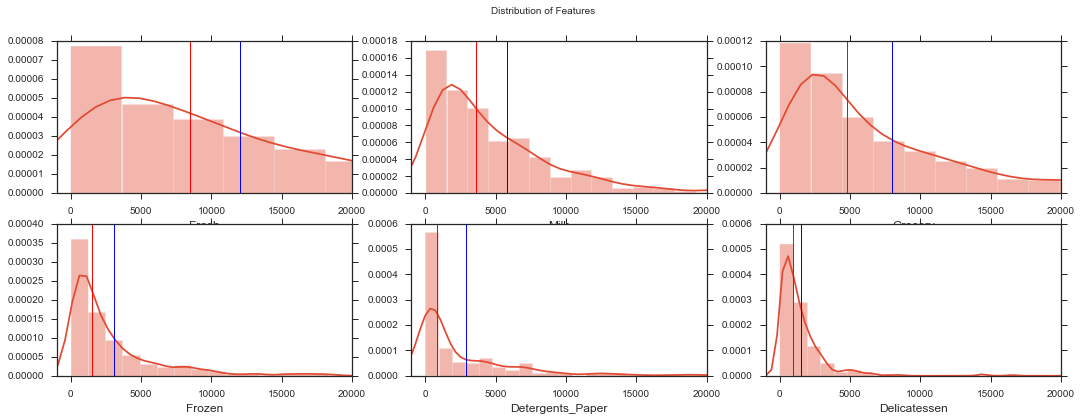

In [141]:
# These plots are generated to see the distribution of data before the scaling. And from the plots 
# we can see that most features are log-normal. This implies that we can achieve normal distribution
# through the logarithm of the data.

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

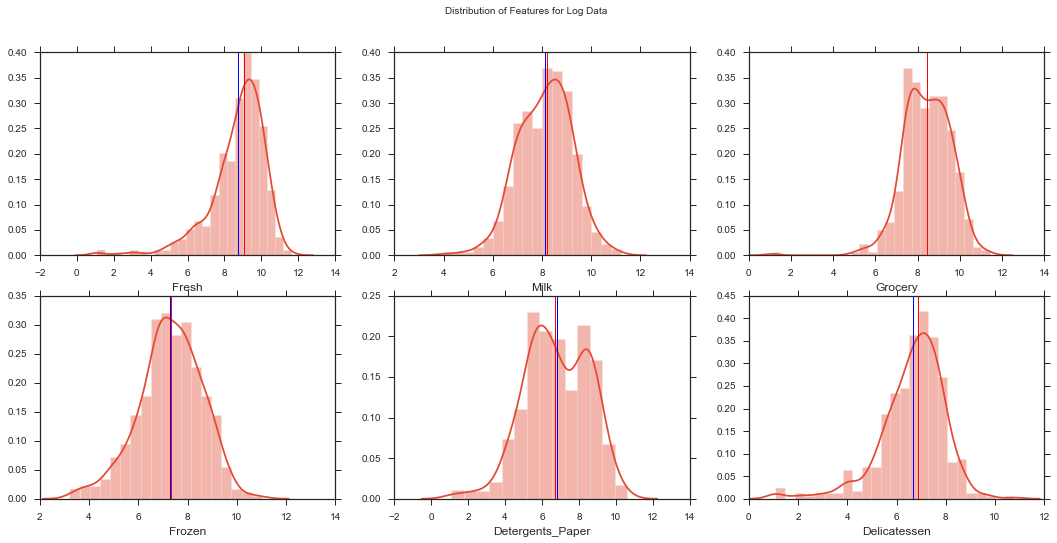

In [142]:
# Visualization after feature scaling. The features is on similar scale after, and this is important for 
# feature clustering. 

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 8)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

In [143]:
# We are going to do more preprocessing to prepare for PCA in the next section. Strictly speaking, PCA assumes that 
# data has a mean of zero and a variance of 1. Although our log_data has a normal distributed property, we can do 
# better than that. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(log_data)

log_data = scaler.transform(log_data)
log_samples = scaler.transform(log_samples)

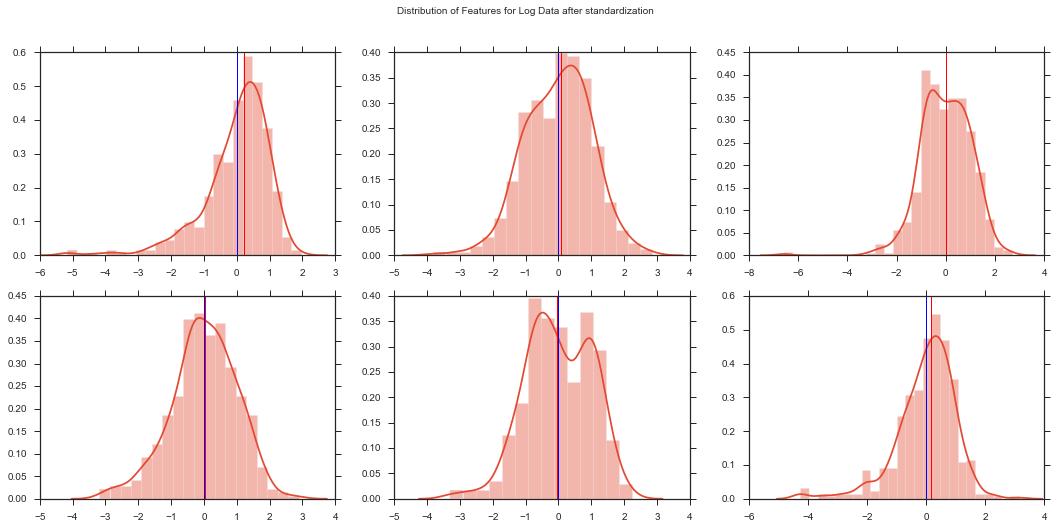

In [174]:
dic={0:"Fresh", 1:"Milk", 2:"Grocery", 3:"Frozen", 4:"Detergents_Paper", 5:"Delicatessen"}
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 8)
fig.suptitle('Distribution of Features for Log Data after standardization')

for i in xrange(log_data.shape[1]):
    feature = log_data[:,i]
    sns.distplot(feature, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(np.median(feature),linewidth=1, color='r')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [148]:
# Display the log-transformed sample data
display(log_samples)

array([[ 1.10523688,  1.2015628 ,  0.83508219, -1.27966629,  0.85969848,
         1.00658707],
       [-0.47490148,  1.26831345,  1.44190824,  0.7620682 ,  1.40789459,
        -0.05401159],
       [-0.46831727,  0.21192724,  1.13814071, -0.73808812, -0.75690935,
         0.74464177]])

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [192]:
# Convert the log_data into dataframe to prepare to future use

log_data_df = pd.DataFrame(log_data, columns=["Fresh", "Milk", "Grocery", 
                                                  "Frozen", "Detergents_Paper", "Delicatessen"])

In [193]:
# For each feature find the data points with extreme high or low values

# OPTIONAL: Select the indices for data points you wish to remove
outliers, count  = [], 0
 
for feature in log_data_df.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data_df[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data_df[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    
    outlier = log_data_df[~((log_data_df[feature] >= Q1 - step) & (log_data_df[feature] <= Q3 + step))]
    count += outlier.shape[0]
    display(outlier)
    outliers.extend(outlier.index.values)


# Remove the outliers, if any were specified
good_data = log_data_df.drop(log_data_df.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,-2.900383,1.693561,2.055320,-2.897620,1.925128,0.454725
66,-4.419217,-0.727143,0.421885,-1.665220,0.794247,-2.573276
81,-2.260213,0.964880,1.017150,-1.290605,1.267092,-1.233656
95,-5.162332,-0.131195,0.268622,-0.946645,-0.802065,-0.077350
96,-3.784560,-0.232976,0.502887,-1.811783,0.858648,-0.981590
128,-2.562859,0.895060,-0.172551,-1.828078,0.105835,-4.251391
171,-2.321600,1.888173,1.303321,-0.641337,1.334135,1.584922
193,-2.392867,0.032567,1.324612,-0.339421,1.074864,-0.125134
218,-3.950364,0.742633,1.065753,-0.111358,0.982962,1.599687
304,-2.468323,0.737188,1.503576,-0.683143,1.505728,0.857110


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,0.885721,2.855165,1.736366,-0.316992,1.815529,0.107374
98,-1.697763,-3.150111,-1.600536,-0.393251,-1.605886,-1.361243
154,-1.554127,-3.808515,-3.158292,-2.325583,-2.815523,-3.502289
356,0.878632,-2.984076,-2.741651,0.589193,-2.669330,-0.274075


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,0.806722,-1.004409,-6.585828,0.849171,-3.308406,0.165965
154,-1.554127,-3.808515,-3.158292,-2.325583,-2.815523,-3.502289


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,-0.202038,1.427797,1.150355,-2.965435,1.199134,-0.453965
57,-0.090130,1.002254,0.732551,-2.855481,1.248494,0.375031
65,-2.900383,1.693561,2.055320,-2.897620,1.925128,0.454725
145,0.859060,0.845295,1.808206,-2.777479,1.544309,1.322056
175,-0.657037,0.783776,0.843964,-2.611025,0.905095,0.589216
264,-1.185298,0.978272,1.079800,-2.486613,1.111189,0.364836
325,1.126298,1.487900,0.967408,2.895443,0.210797,1.502278
420,-0.222227,0.414743,0.940752,-3.181814,1.187478,0.438451
429,0.223072,-0.605179,-0.231456,-2.689816,-1.370022,0.885417
439,-0.539657,-0.633106,-0.549941,-2.437112,-0.359763,-2.072714


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,0.806722,-1.004409,-6.585828,0.849171,-3.308406,0.165965
161,0.471896,-1.693748,-2.507593,-0.238200,-3.308406,0.798851


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,-4.419217,-0.727143,0.421885,-1.665220,0.794247,-2.573276
109,-1.002470,1.484861,1.644448,-0.615434,-0.033357,-4.251391
128,-2.562859,0.895060,-0.172551,-1.828078,0.105835,-4.251391
137,-0.470505,0.811102,0.520827,-0.629456,-0.119445,-2.353561
142,1.210170,0.698153,0.517680,0.548137,-2.204828,-4.251391
154,-1.554127,-3.808515,-3.158292,-2.325583,-2.815523,-3.502289
183,1.206710,2.379109,1.319203,2.497587,-0.761757,3.140996
184,-1.989047,-1.202487,0.014597,-2.336044,-0.567071,-3.259072
187,-0.630153,0.802121,0.673517,1.123840,0.792736,-4.251391
203,-1.597927,-1.473545,-0.661681,-0.896899,0.043449,-2.882947


In [86]:
from collections import Counter
outlier_dict = Counter(outliers)

which_outlier = [a for a in outlier_dict if outlier_dict[a]>1]
print which_outlier

[128, 154, 65, 66, 75]


The outliers that appear simultaneously at different features


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,140,8847,3823,142,1062,3
1,622,55,137,75,7,8
2,85,20959,45828,36,24231,1423
3,9,1534,7417,175,3468,27
4,20398,1137,3,4407,3,975


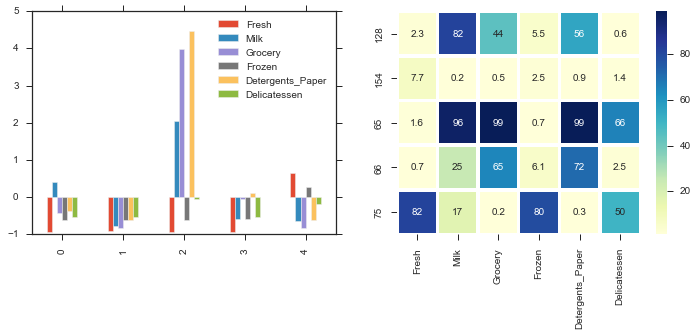

In [163]:
indices = [128, 154, 65, 66, 75]

# Check if outliers are significantly differed from the others.
outliers_samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "The outliers that appear simultaneously at different features"
display(outliers_samples)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

outliers_samples_for_plot = outliers_samples.copy()
outliers_samples_for_plot = (outliers_samples_for_plot - data.mean())/data.std()
labels = ['Sample 128','Sample 154','Sample 65', 'Sample 66', 'Sample 75']
outliers_samples_for_plot.plot(ax=axes[0], kind='bar')
_ = plt.xticks(range(5),labels)

out_percentiles = data.rank(pct=True)
out_percentiles = 100*out_percentiles.round(decimals=3)
out_percentiles = out_percentiles.iloc[indices]
sns.heatmap(out_percentiles, vmin=1, vmax=99, annot=True,linewidths=2.5, cmap="YlGnBu",ax=axes[1])

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**<span style='color:blue'> Added: I specified the data points that are considered outliers for more than one features. Code block is above <span>**

**Answer:**

- At first there are 440 points, and after the removal only 398 points are left. Therefore, 42 points are removed. And in the variable `count`, there are 48 points in total. And that's means, there are less than 6 points that are considered as outliers for more than one feature. (128, 154, 65, 66, 75)


- I think we should definitely remove those data points out from the training set. Because if we the k-means clustering algotithm, it takes the mean value of all features to be centroid in each iteration. If the value is extremely large, then it will definitely skew the location of the computed centroid. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

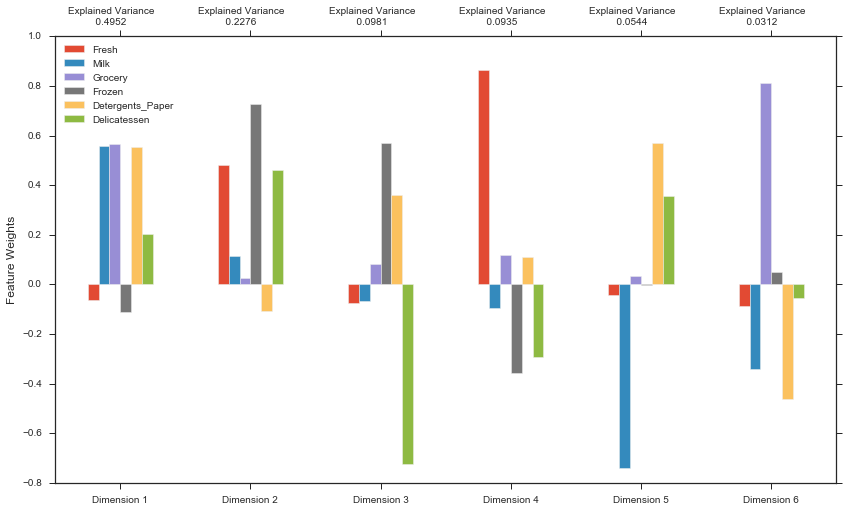

In [194]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

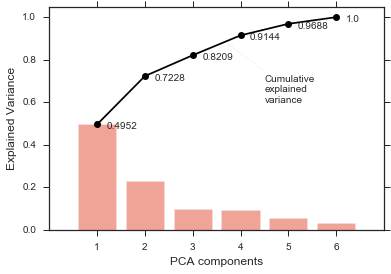

In [198]:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative\nexplained\nvariance',
             xy=(3.7, .88), arrowprops={'arrowstyle':'->'}, xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [199]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4952
Dimension 2    0.7228
Dimension 3    0.8209
Dimension 4    0.9144
Dimension 5    0.9688
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


**Answer:**

72.52% of the variance if explained by the first and second principal component, and 92% of the variance is explained by the first four. 

From the figure above we can see the linear coefficients of each feature for very principal component. A High positive or nagetive value indicates that this principal component is highly affected by this feature, either positively or negatively. While a low absolute value means this feature contribute little to the component.

- In the first dimension, we can see that the majority contribution comes from Detergents_Paper, and there are also a reasonable amount of contribution comes from Grocery and Milk. It seems that this dimension is representing the retail goods.

- In the second dimension, Fresh/Frozen/Delicatessen contribute a similar amount of contribution to the component, and obviously this dimension can be described as Food.

- In the third dimension, a significant amount of positive contribution is placed on Fresh, while Delicatessen and Frozen contribute the major negative contribution. I feel like this dimension is trying to distinguish Fresh food from Frozen and Delicatessen. I mean, the first dimension focus on the commonality of food between those three types of food, while the third dimension is more dedicated into finding Fresh food.

- In the fourth dimension, Frozen food contribute a large positive amount and the Fresh and Delicatessen contribute negatively. Similar to dimension three, this dimension is trying to be able to distinguish from three types of food. While at this time, it focus more on Frozen food.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [117]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.3581,0.4961,1.0638,-2.0676,-0.0663,0.3628
1,3.0820,0.1314,-0.3994,1.4197,0.4747,-0.2263
2,0.0446,-0.6358,-1.1500,-1.5191,0.7592,-1.2104


In [118]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,8.038189,8.349957,9.710085,6.354370,5.484797,7.640123


The first table is the samples data after PCA transformation, and the second table is the original features.

`~>` means slightly larger;

|    | Original Feature Space | PCA feature Space | Match or Not? |
| ---| ---------------------- | ----------------- | ------------- |
|Retail (Milk+Grocery+Detergents)|C1 > C0 > C2|C1 > C0 > C2| Yes  |
|Food (Fresh+Frozen+Delicatessen) | C0 ~> C1 ~ C2 | C0 > C1 > C2 | No|
|Large Fresh Small Deli| C0 ~ C1 > C2 | C0 > C1 > C2 | Not quite |
|Large Frozen No Deli or Fresh| C1 > C2 > C0 | C1 > C2 > C0 | Yes |


I think for these three samples, part of the original features agree with my initial interpretation. For the second dimension, which is quite inconsistent, I am not sure what's happening. It just doesn't make sense. 

 <span style="color:red">Hi, can I ask a question here? I am not really sure why for some features they are not consistent. I was wondering if my interpretation make sense. I am particularly confused about what is the positive and negative value in the feature weight mean? For example, feature Delicatessen has a large negative value in dimenison 3, does that mean whoever has a large spend on Deli would receive a lower feature weight in dimension 3?</span>.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [202]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [121]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.3581,0.4961
1,3.0820,0.1314
2,0.0446,-0.6358


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

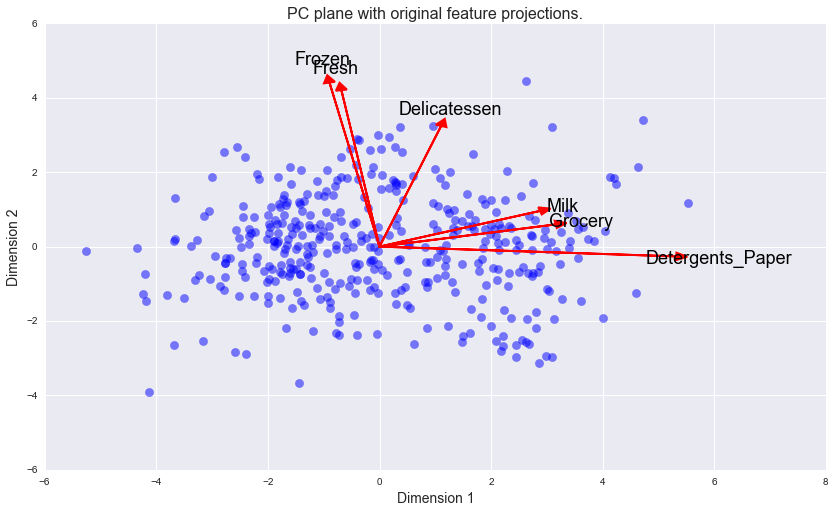

In [122]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**

From the biplot, it's clear that Detergents_Paper, Milk and Grocery are strongly correlated with the first component, while Fresh, Frozen and Deli are correlated with the second component. Yes, it agrees.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

The difference between K-Means and Gaussian Mixture Model (GMM) is that GMM uses a soft assignment strategy. That means, for each data point, instead of giving a hard assignment by assigning them to one of the clusters, GMM assigns a probablity for them, indicating the likelihood of that point for each cluster. 

Due to this fundemental difference, GMMs can fit the data points to a much more complex shape by choosing the right parameters in the covariance matrix, while K-means assigns the data point to the cloest cluster in terms of Euclidian distance. Thus in K-means, each direction is treated equally. That means, GMMs has more representation power than K-means. 

But this comes at the cost of speed. For K-means, it's very fast to implement because the parameters needed to learn is the coordinates of each cluster's center. The number of parameters grows linearly with the number of features. While for GMMs, if we add one more feature to the model, we need to figure out the covariance between this feature and all the other features, which might make it very slow. In fact, the number of paramaters grows quadratically in the number of features. 

In our cases, I think the data points will falls into two clusters, Food and retail goods. But there is one feature, Milk, which I think would cause ambiguity. Based on the analysis above, we know that it gots more similarity with retail goods. But it's also a kind of food. Therefore, I choose GMMs here, because it's more accurate to describe such case in probability. 



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [203]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

clusterer = GMM(n_components=2, covariance_type='full', random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print 'score is %f' % score

score is 0.420847


In [205]:
# Calculate the silhouette_score without removing outliers.
clusterer = GMM(n_components=2, covariance_type='full', random_state=0).fit(log_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(log_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(log_data, preds)
print 'score is %f' % score

score is 0.251144


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

- number of cluster 2, score - 0.443759
- number of cluster 3, score - 0.378174
- number of cluster 4, score - 0.275286
- number of cluster 5, score - 0.278132

Obviously, the dataset best fit into 2 clusters. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

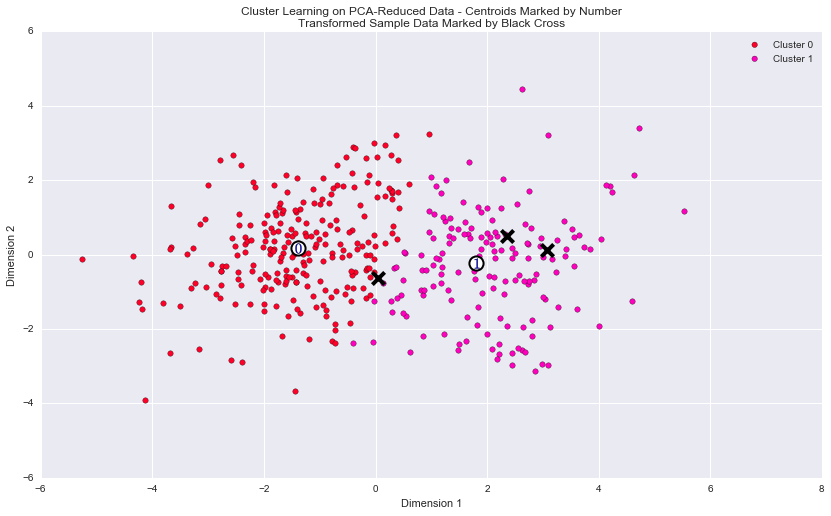

In [130]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [131]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9658.0,1955.0,2467.0,2250.0,308.0,785.0
Segment 1,5525.0,6843.0,10029.0,1154.0,3525.0,1073.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [136]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

I would use the 50% and 75% percentage for analysis instead of mean, because this data description is done of data set with outlier. 

We can see that Segment 0 has slightly more spending on Fresh, Frozen than 50% of the customer; nearly half of the spending on Milk, Grocery and Detergents_Paper. And light less Delicatessen than 50% of the customers. This could be seen as a supermarker of mid size selling Fresh and Frozen food mostly, and at the same time they might have a small cafe inside. 

For segment 1, he spends almost twice as much on Milk and Grocery, and fourth as much on Detergents_Paper. But it also spend slightly less than 50% of the others on Frozen, and slightly more than 50% on Delicatesse. Therefore, I feel like this could be a large retail store with bakery inside. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [138]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,3067,13240,23127,3941,9959,731
2,3097,4230,16483,575,241,2080


In [139]:
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9658.0,1955.0,2467.0,2250.0,308.0,785.0
Segment 1,5525.0,6843.0,10029.0,1154.0,3525.0,1073.0


In [137]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

- For sample 0, although it got a huge spent on Fresh, it spent almost nothing on Frozen. At the same time, it spend a tremendous amount on Milk, Grocery and Detergent paper. Therefore, I think it belongs to Cluster 1. And that matches the clustering result. 

- For sample 1, it spends quite a lot on Milk, Grocery and Detergents_Paper, I feel like it belongs to Cluster 1. And this matches as well. 

- For sample 3, it's a hard one. It spends way too less in Fresh, Milk and Frozen, these three features here are not very informative. While for the other three, it send quite a lot on Grocery, very less in Detergents_paper and a lot of Delicatessen. I would like to say this sample lies between the boundary between two clusters, and might be a bit more like the samples in Segment 0.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We definitely can not treat all customers equally. 

- I think customers who consume Fresh Food frequenly would be likely to react negatively. Therefore for these part of customers, I don't think the distributor should change the delivery service. 

- However, for those who consume mostly on Grocery, Detergents_Paper. I think they are less likely to react negatively. But it's not quite possible for them to react possibly unless the distributor transfer the saving partially to them, such as giving them a discount in buying more for each delivery. I do think that if we have to deploy the changes to part of the customers, we should have this part (Segment 1)of the customers to experiment this changes first. 

- For those who comsume more on Milk and Deli, it's not clear how would they response. Because some of the diary product‘s expiration date might be really close to the production day. And the same of the Deli. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

- One of the intuitive approach is to use the customer segment as target label for an supervised learning algorithm, such as boosting or SVM, then then used to trained classifier to predict the new data points. 

- Another approach is to make use of the clustering algorithm itself. During the E step of trianing, we assigned data points to cluster based on the current parameters, we can keep the parameters fixed, and use the new data along with the old one to update parameters in M step. And at the end we get cluster label for every data point. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

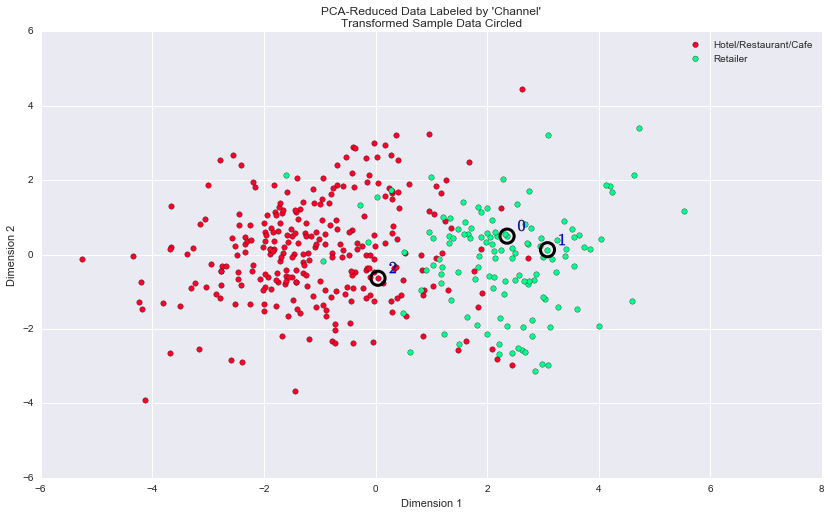

In [140]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

I think the distribution of Hotel/Restaurant/Cafe confirms what I intuitively think what the clustering would look like, and it also confirms with the GMMs clustering we choose, and 2 clusters are what the shilouette score recommends as well. 

There are some 'purly Retailers or Hotels/Resaurant/Cafe', but there also exist some samples that are quite ambiguious, such as the green dots on the left and the right dots on the right. But generally, i think these classification consistent with our previous definition. 



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.